In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings('ignore')

## **Loading the Dataset**

In [48]:
#creating database connection
from sqlalchemy import create_engine
import urllib

params = urllib.parse.quote_plus(
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=DESKTOP-61EE3FN;"
    "DATABASE=inventory_db;"
    "Trusted_Connection=yes;"
)

# Create engine
engine = create_engine(f"mssql+pyodbc:///?odbc_connect={params}")

print("Connected to inventory_db successfully ")

Connected to inventory_db successfully 


In [49]:
#fetching vendor summary data

df=pd.read_sql("SELECT * FROM vendor_sales_summary",engine)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


## **Exploratory Data Analysis**

In [50]:
#summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,10650.649458,18753.519148,2.000000,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,18039.228769,12662.187074,58.000000,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,24.385303,109.269375,0.360000,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,35.643671,148.246016,0.490000,10.990000,15.990000,28.990000,7.499990e+03
TotalPurchaseQuantity,10692.0,3140.886831,11095.086769,1.000000,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,30106.693372,123067.799627,0.710000,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10514.0,3129.583317,11037.801407,1.000000,36.000000,280.000000,1985.000000,3.349390e+05
TotalSalesDollars,10514.0,42954.173834,168977.755843,1.980000,809.820000,5599.700000,29524.250000,5.101920e+06
TotalSalesPrice,10514.0,19111.958773,45264.605387,0.990000,334.890000,3020.085000,16442.477500,6.728193e+05
TotalExciseTax,10514.0,1804.263569,11065.659557,0.060000,5.382500,50.425000,436.730000,3.682428e+05


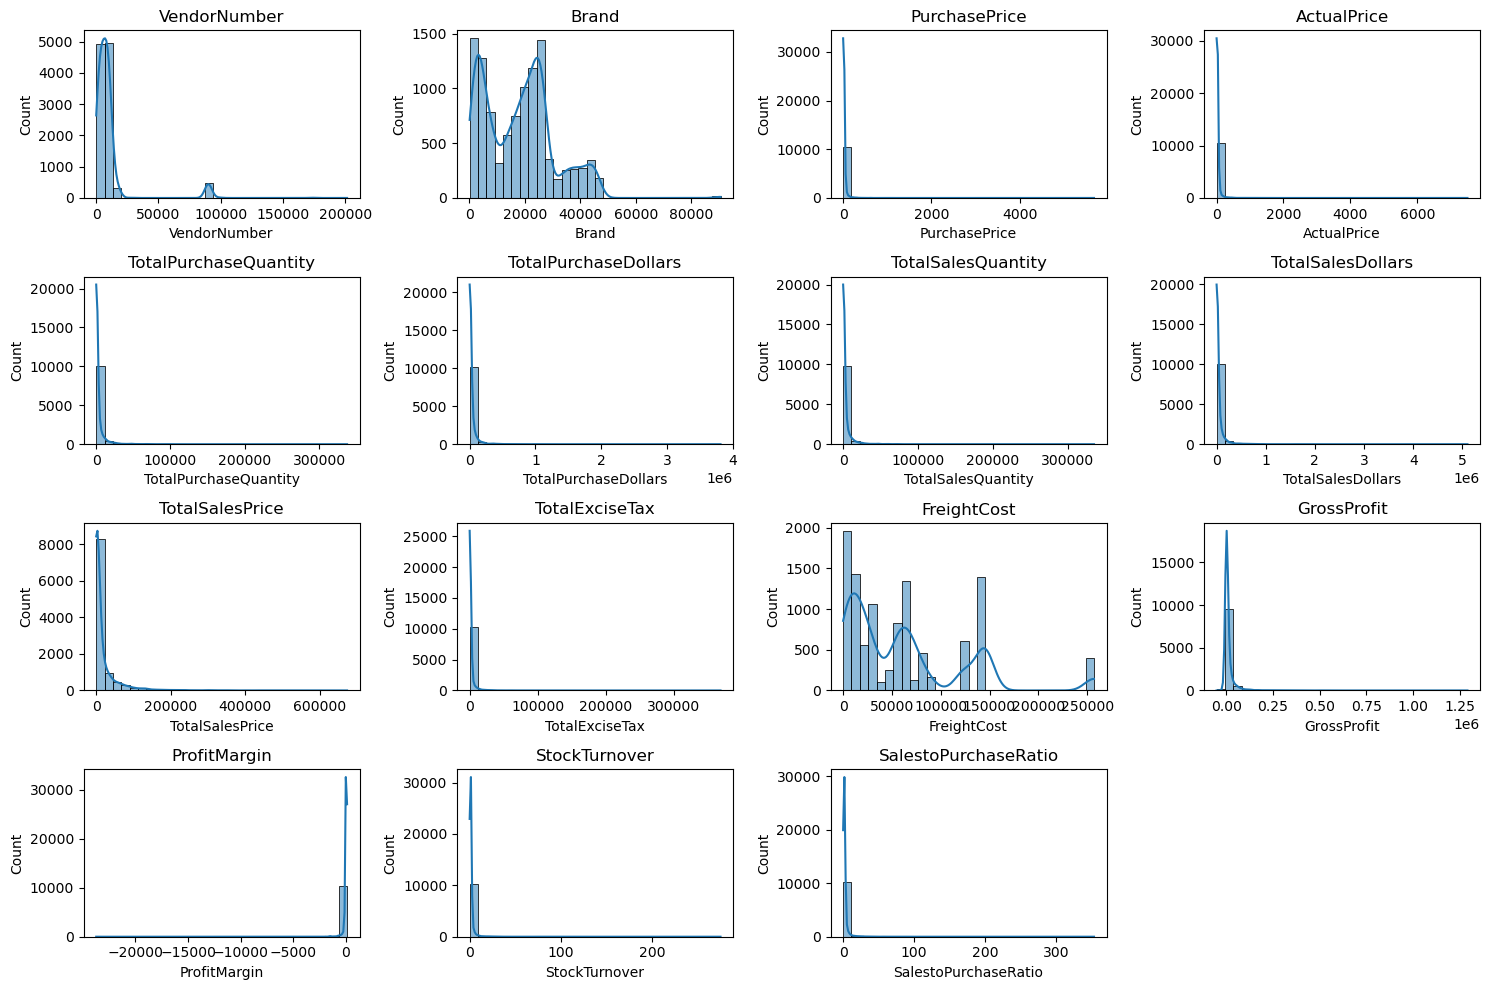

In [51]:
#Distribution plots for Numerical Columns
numerical_cols=df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

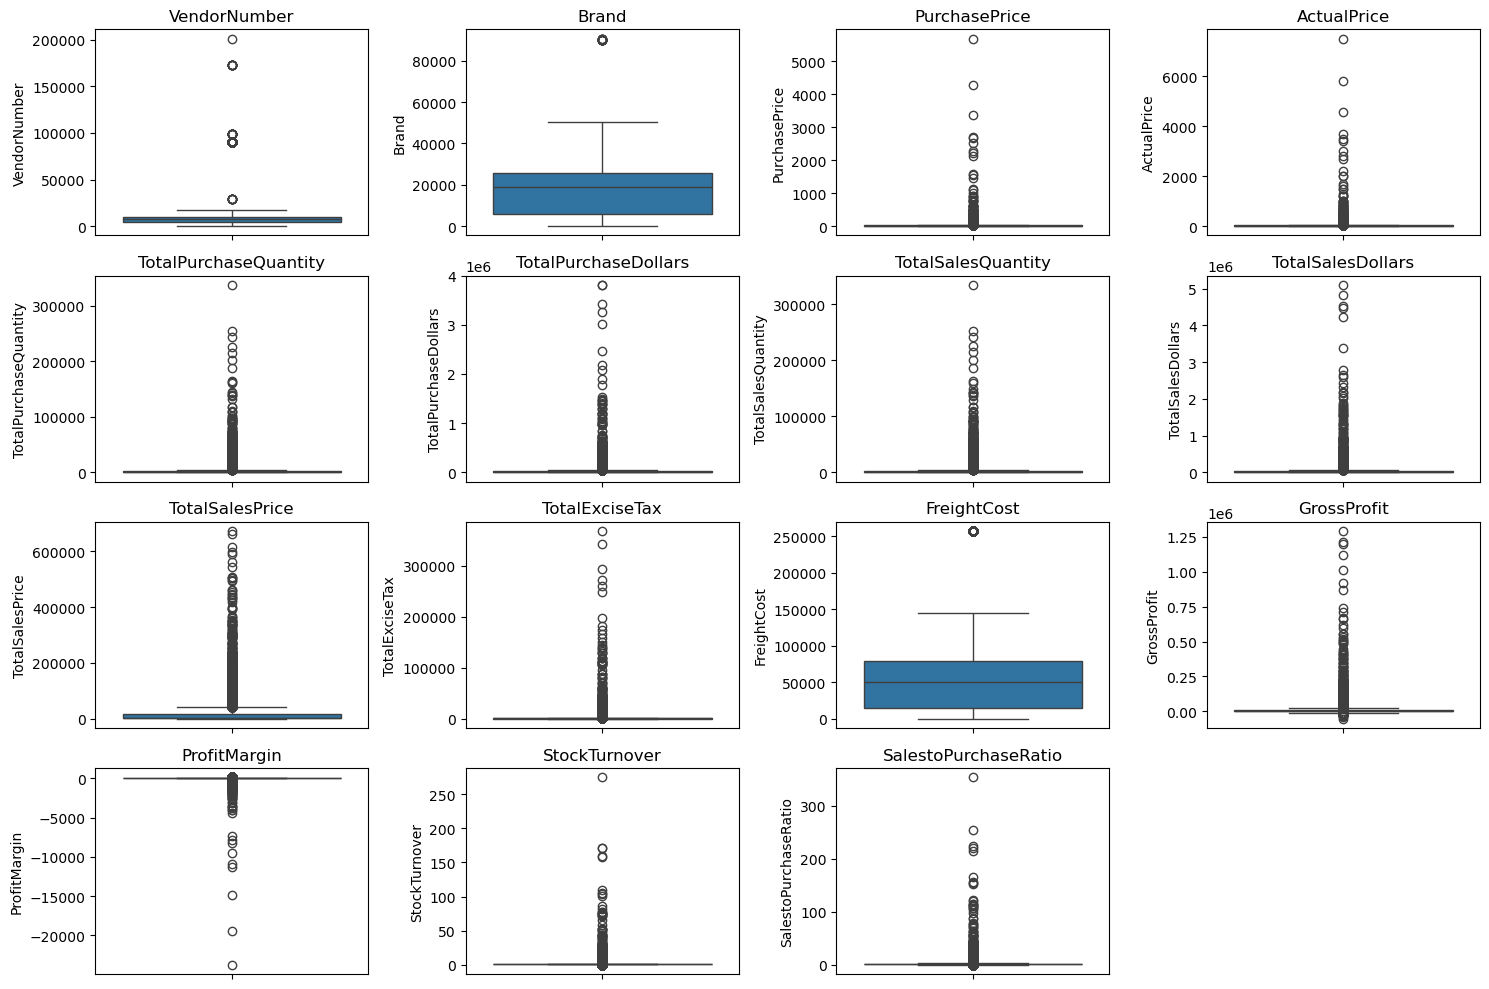

In [52]:
#Outliers Detection with Boxplot
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

  ## **Summary Statistics Insights:**
,
**Negative & zero values:**
* Gross Profit: Minimum value is -52002.78,indicating losses.Some products or transactions may be selling at a loss due to high costs or selling at discounts lower than the purchase price.
* Profit margin: Negative profit margin indicates that total costs exceed sales revenue, resulting in losses for those vendors or products.
* Total Sales Quantity & Sales Dollars: Minimum values are 0,meaning some products were ourchased but never sold.These could be slow moving or obsolete stock.

**Outliers indicated by High Standard Deviations:**
* Purchase & Actual Price: The max values(5,681.81 & 7,499.99) are significantly higher than the mean(24.39 & 35.64),indicating potential premium products.
* Freight Cost: Huge variation,from 0.09 to 257,032.07 suggests logistics inefficiencies or bulk shipments.
* Stock Turnover: Ranges from 0 to 274.5,implying some product sell extremely fast while others remain in stock indefinitely.Value more than 1 indicates that Sold quantity for that product is higher than purchased quantity due to either sales are being fulfilled from older stock.

In [53]:
#let's filter the data by removing inconsistancies
df= pd.read_sql("""SELECT *
FROM vendor_sales_summary
WHERE GrossProfit >0
AND ProfitMargin >0 
AND TotalSalesQuantity >0""",engine)

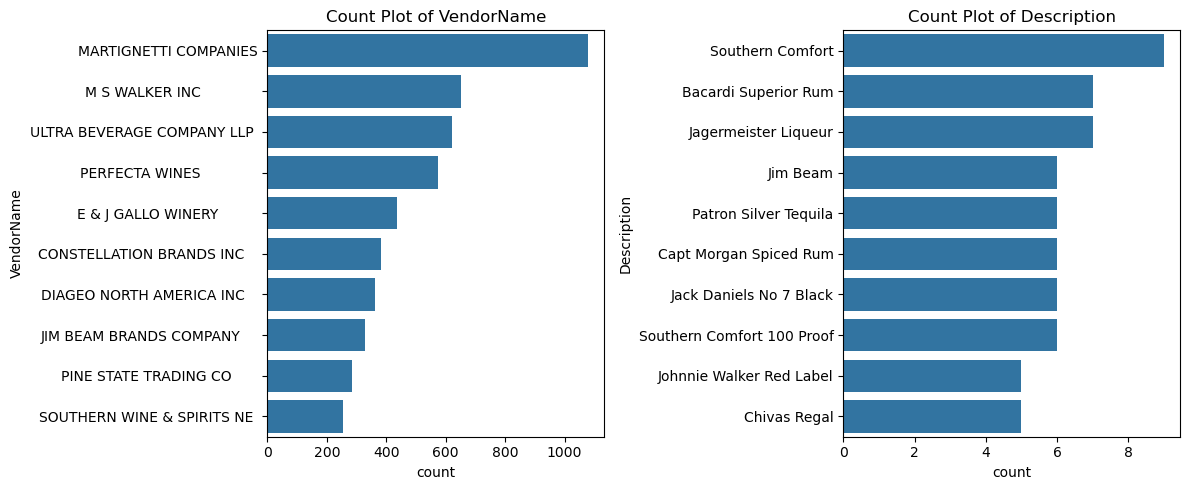

In [54]:
#Count plots for Categorical columns
categorical_cols =['VendorName','Description']

plt.figure(figsize=(12,5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1,2,i+1)
    sns.countplot(y=df[col],order=df[col].value_counts().index[:10])
    plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt.show()

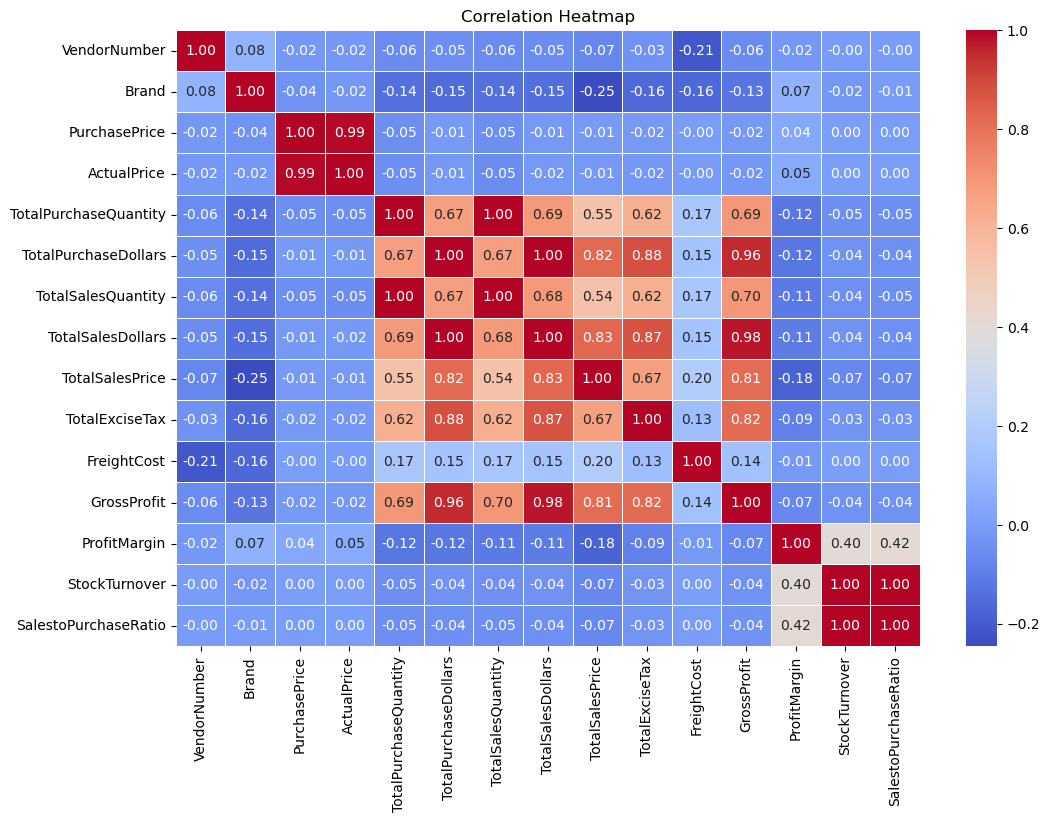

In [55]:
#Correlation Heatmap
plt.figure(figsize=(12,8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix,annot=True,fmt=".2f",cmap="coolwarm",linewidth=0.5)
plt.title("Correlation Heatmap")
plt.show()

## **Correlation Insights**

* TotalSalesDollars and GrossProfit show a very strong positive correlation (0.98), indicating that higher sales lead to higher profit.

* TotalPurchaseDollars is highly correlated with GrossProfit (0.96) and TotalSalesDollars (≈1.00), showing strong linkage between buying and selling.

* TotalPurchaseQuantity and TotalSalesQuantity have perfect correlation (1.00), reflecting efficient inventory flow.

* PurchasePrice and ActualPrice are perfectly correlated (1.00), indicating stable pricing.

* TotalExciseTax is strongly related to TotalSalesDollars (0.87) and GrossProfit (0.82).

* FreightCost has weak correlation with GrossProfit (0.14), showing limited impact on profitability.

* ProfitMargin has very low correlation with other variables (≈0.00–0.05), suggesting inconsistent margins.

* StockTurnover and SalestoPurchaseRatio are perfectly correlated (1.00), representing similar inventory efficiency.

## **Data Analysis**

**Identify Brands that needs Promotional or Pricing Adujustments which exhibit lower sales performance but higher profile margins.**

In [56]:
brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars':'sum',
    'ProfitMargin':'mean'}).reset_index()

In [57]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

In [58]:
low_sales_threshold

np.float64(560.299)

In [59]:
high_margin_threshold

np.float64(64.97017552750113)

In [60]:
#Filter brands with low sales but high profit margins
target_brands = brand_performance[
     (brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
     (brand_performance['ProfitMargin'] >= high_margin_threshold)
]
print("Brands with Low Sales but High Profit Margins:")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with Low Sales but High Profit Margins:


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


In [61]:
brand_performance = brand_performance[brand_performance['TotalSalesDollars']< 10000] #for better Visualization

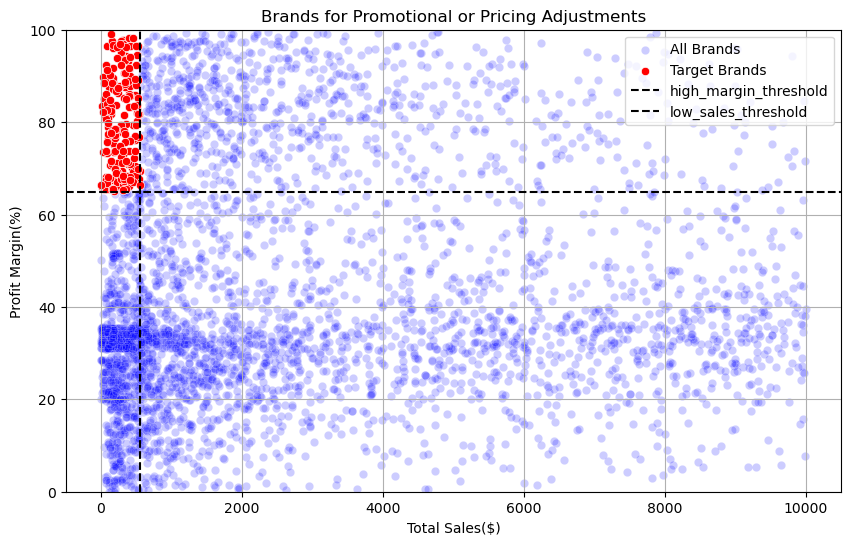

In [62]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=brand_performance,x='TotalSalesDollars',y='ProfitMargin',color="blue",label="All Brands",alpha=0.2)
sns.scatterplot(data=target_brands,x='TotalSalesDollars',y='ProfitMargin',color="red",label="Target Brands")

plt.axhline(high_margin_threshold,linestyle='--',color="black",label='high_margin_threshold')
plt.axvline(low_sales_threshold,linestyle='--',color="black",label='low_sales_threshold')

plt.xlabel("Total Sales($)")
plt.ylabel("Profit Margin(%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.ylim(0, 100)
plt.legend()
plt.grid(True)
plt.show()

**Which vendors & Brands demonstrate the highest sales performance?**

In [63]:
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value / 1_000:.2f}K"
    else:
        return f"{value:.2f}"

In [64]:
#Top Vendors and Brands by Sales Performance
top_vendors = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands = df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)

In [65]:
top_vendors.apply(lambda x : format_dollars(x))

VendorName
DIAGEO NORTH AMERICA INC       67.99M
MARTIGNETTI COMPANIES          39.28M
PERNOD RICARD USA              32.06M
JIM BEAM BRANDS COMPANY        31.42M
BACARDI USA INC                24.85M
CONSTELLATION BRANDS INC       24.22M
E & J GALLO WINERY             18.40M
BROWN-FORMAN CORP              18.25M
ULTRA BEVERAGE COMPANY LLP     16.50M
M S WALKER INC                 14.71M
Name: TotalSalesDollars, dtype: object

In [66]:
top_brands.apply(lambda x : format_dollars(x))

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: TotalSalesDollars, dtype: object

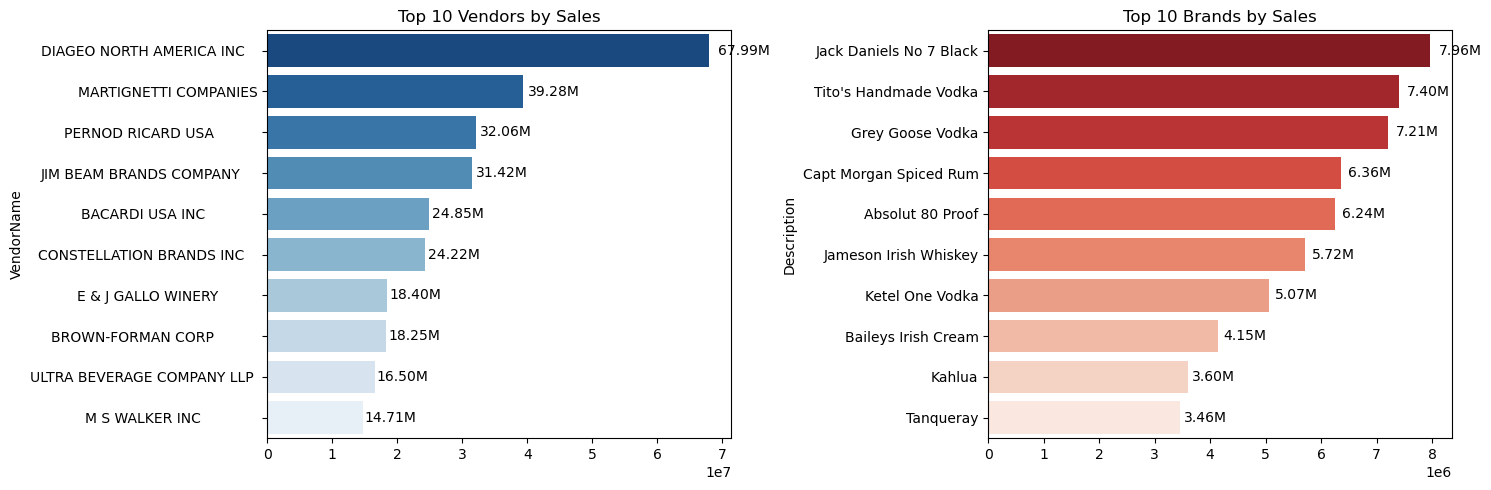

In [67]:
plt.figure(figsize=(15,5))

#plot for Top Vendors
plt.subplot(1,2,1)
ax1=sns.barplot(y=top_vendors.index,x=top_vendors.values,palette="Blues_r")
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02),
            bar.get_y() + bar.get_height()/ 2,
            format_dollars(bar.get_width()),
            ha='left',va='center',fontsize=10,color='black')

#plot for Top Brands
plt.subplot(1,2,2)
ax2=sns.barplot(y=top_brands.index.astype(str),x=top_brands.values,palette="Reds_r")
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width() * 0.02),
            bar.get_y() + bar.get_height()/ 2,
            format_dollars(bar.get_width()),
            ha='left',va='center',fontsize=10,color='black')

plt.tight_layout()
plt.show()

**Which vendors contribute the most to total purchase dollars?**

In [68]:
vendor_performance = df.groupby('VendorName').agg({
    'TotalPurchaseDollars':'sum',
    'GrossProfit':'sum',
    'TotalSalesDollars':'sum'
}).reset_index()

In [69]:
vendor_performance['PurchaseContribution%'] = vendor_performance['TotalPurchaseDollars'] / vendor_performance['TotalPurchaseDollars'].sum()

In [70]:
vendor_performance = round(vendor_performance.sort_values('PurchaseContribution%',ascending=False),2)

In [71]:
#Display Top 10 Vendors
top_vendors = vendor_performance.head(10)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,0.16
57,MARTIGNETTI COMPANIES,25.46M,13.81M,39.28M,0.08
69,PERNOD RICARD USA,23.85M,8.21M,32.06M,0.08
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,0.08
6,BACARDI USA INC,17.43M,7.42M,24.85M,0.06
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,0.05
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,0.04
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,0.04
107,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,0.04
53,M S WALKER INC,9.76M,4.94M,14.71M,0.03


**How much of total procurement is dependent on the Top vendors?**

In [72]:
print(f"Total Purchase Contribution of Top 10 vendors is {round(top_vendors['PurchaseContribution%'].sum(),2)} %")

Total Purchase Contribution of Top 10 vendors is 0.66 %


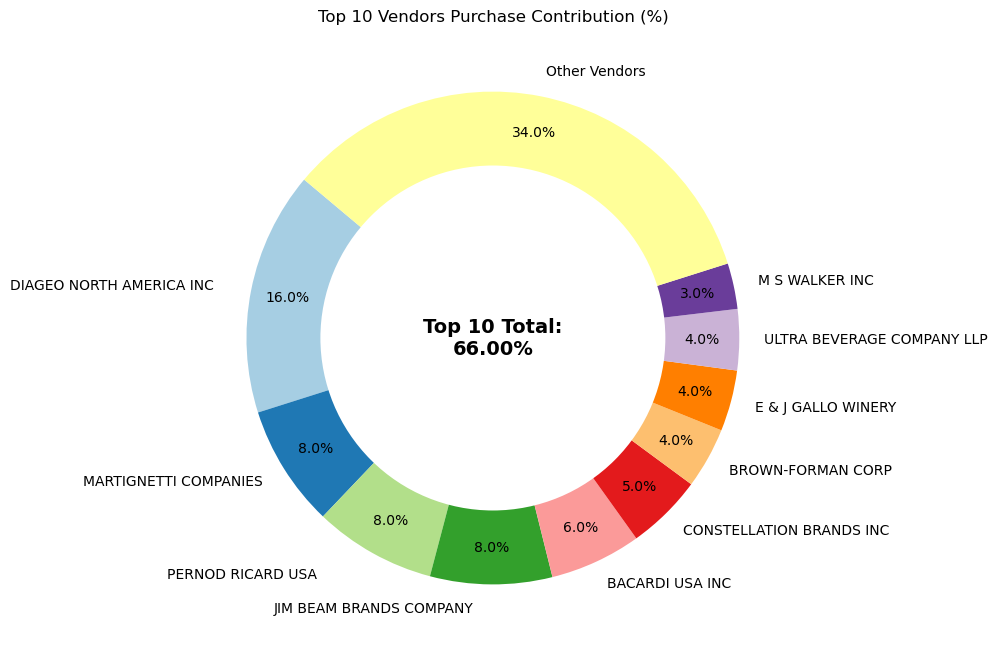

In [73]:
vendors = list(top_vendors['VendorName'])
purchase_contributions = list(top_vendors['PurchaseContribution%']*100)
total_contribution = sum(purchase_contributions)
remaining_contribution =  100 - total_contribution

# Append "Other Vendors" category
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)


# Donut Chart
fig, ax = plt.subplots(figsize=(8,8))
wedges,texts,autotexts = ax.pie(purchase_contributions, labels=vendors,autopct='%1.1f%%',
                               startangle=140, pctdistance=0.85, colors=plt.cm.Paired.colors)


# Draw a white circle in the center to create a "Donut" effect
centre_circle = plt. Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

# Add Total Contribution annotation in the center
plt.text(0,0,f"Top 10 Total:\n{total_contribution:.2f}%",fontsize=14,fontweight='bold',ha='center',va='center')

plt.title("Top 10 Vendors Purchase Contribution (%)")
plt.show()

**Does purchasing in bulk reduce the unit price,and what is the optimal purchase volume for cost savings?**

In [74]:
df['UnitPurchasePrice']=df['TotalPurchaseDollars'] / df['TotalPurchaseQuantity']

In [75]:
df["OrderSize"] = pd.qcut(df['TotalPurchaseQuantity'],q=3,labels=['Small','Medium','Large'])

In [76]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Small,39.068186
Medium,15.486414
Large,10.777625


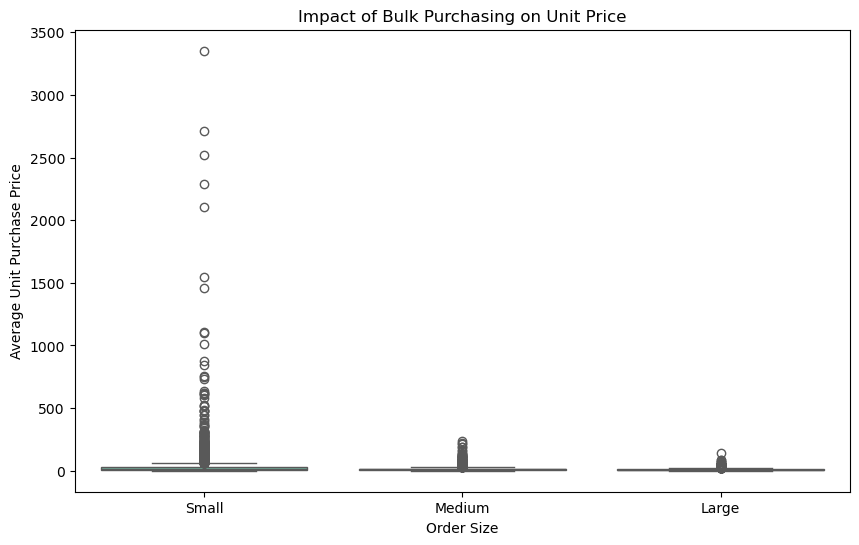

In [77]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='OrderSize',y='UnitPurchasePrice',palette='Set2')
plt.title("Impact of Bulk Purchasing on Unit Price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.show()

* Vendors buying in bulk (Large Order Size)get the lowest unit price($10.77per unit),meaning higher margins if they can manage inventory efficiently.
* The price difference between Small and Large orders is substantial(~72%reduction in unit cost)
* This suggests that bulk pricing strategies successfully encourage vendors to purchase in larger volums,leading to higher overall sales despite lower per unit revenue.

**Which vendors have low inventory turnover,indicating excess stock and slow-moving products?**

In [78]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover',ascending=True).head(10)

,StockTurnover
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


**How much capital is locked in unsold inventory per vendor,and which vendors contribute the most to it?**

In [79]:
df['UnsoldInventoryValue']=(df['TotalPurchaseQuantity'] - df['TotalSalesQuantity']) * df['PurchasePrice']
print('Total Unsold Capital:',format_dollars(df['UnsoldInventoryValue'].sum()))


Total Unsold Capital: 2.71M


In [80]:
#Aggregate Capital Locked per Vendor
inventory_value_per_vendor = df.groupby("VendorName")["UnsoldInventoryValue"].sum().reset_index()

#Sort Vendors with the Highesr Lockes Captital
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by="UnsoldInventoryValue",ascending=False)
inventory_value_per_vendor["UnsoldInventoryValue"]=inventory_value_per_vendor["UnsoldInventoryValue"].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,722.21K
46,JIM BEAM BRANDS COMPANY,554.67K
69,PERNOD RICARD USA,470.63K
117,WILLIAM GRANT & SONS INC,401.96K
30,E & J GALLO WINERY,228.28K
80,SAZERAC CO INC,198.44K
11,BROWN-FORMAN CORP,177.73K
20,CONSTELLATION BRANDS INC,133.62K
62,MOET HENNESSY USA INC,126.48K
78,REMY COINTREAU USA INC,118.60K


**Vendor Profitability Ranking**

In [81]:
vendor_performance['ProfitRatio'] = (
    vendor_performance['GrossProfit'] /
    vendor_performance['TotalSalesDollars'])

vendor_performance.sort_values(
    by='ProfitRatio',
    ascending=False).head(10)

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,ProfitRatio
35,FLAVOR ESSENCE INC,17.00,1457.41,1474.41,0.0,0.988470
16,CAPSTONE INTERNATIONAL,54.64,192.23,246.87,0.0,0.778669
86,SILVER MOUNTAIN CIDERS,77.18,265.33,342.51,0.0,0.774664
1,ALISA CARR BEVERAGES,25698.12,78772.82,104470.94,0.0,0.754017
44,"IRA GOLDMAN AND WILLIAMS, LLP",190.88,474.94,665.82,0.0,0.713316
103,THE PIERPONT GROUP LLC,5249.87,12065.81,17315.68,0.0,0.696814
90,STAR INDUSTRIES INC.,2452.29,5418.47,7870.76,0.0,0.688430
77,R.P.IMPORTS INC,18425.33,32388.28,50813.61,0.0,0.637394
33,FANTASY FINE WINES CORP,128.64,198.95,327.59,0.0,0.607314
109,VINEDREA WINES LLC,4657.60,6728.00,11385.60,0.0,0.590922


* Vendors such as FLAVOR ESSENCE INC (98.8% profit ratio on $1,474 sales) and  ALISA CARR BEVERAGES (75.4% profit ratio on $104,470 sales) demonstrate high profitability despite low purchase contributions (≈0%), indicating strong efficiency and growth potential.

**Vendor Risk Segmentation (High Value)**

In [82]:
df['VendorCategory'] = np.where(
    (df['ProfitMargin'] > 20) & (df['StockTurnover'] > 1),
    'High Performer',
    np.where(
        (df['ProfitMargin'] < 0) | (df['StockTurnover'] < 1),
        'Risk',
        'Average'))


In [83]:
df['VendorCategory'].value_counts()

VendorCategory
Risk              4228
High Performer    3462
Average            874
Name: count, dtype: int64

* Most vendors fall into the Risk (4,228) and High Performer (3,462) categories, indicating a polarized performance pattern with relatively fewer Average vendors (874).